# Plotting and Visualization
[The Matplotlib Object Hierarchy](https://realpython.com/python-matplotlib-guide/#:~:text=This%20one-liner%20hides%20the%20fact%20that%20a%20plot,matplotlib%20graphic%2C%20which%20can%20contain%20multiple%20Axes%20objects.)

Figure (holds one or more plots, or what python calls axes) -> Axes (reallly means plot) -> Axis -> major tick -> minor tick
example of trace: one_tick = fig.axes[0].yaxis.get_major_ticks()[0]

In [74]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [75]:
# generates an ipywidget that renders plots in a control. Multiple plots and zooming are supported
#%matplotlib widget 
# This is the default and will render images as PNGs
#%matplotlib inline

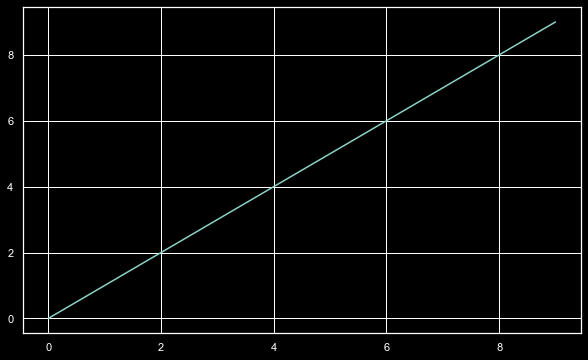

In [76]:
# a simple plot
data = np.arange(10)
plt.plot(data)

### Figures and Subplots

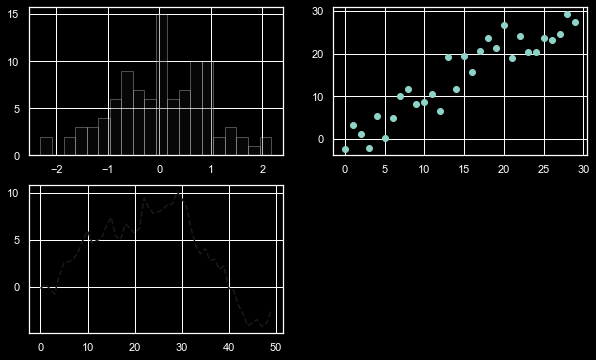

In [77]:
# all these commadns must be in the same Jupyter cell
fig = plt.figure() # creates a new figure object
ax1 = fig.add_subplot(2, 2, 1) # figure is a 2 x 2 (up to 4 plots in total). The last parameter selects the first plot
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# when we issue a ploting command, matplotlib draws on the last figure and subplot
plt.plot(np.random.randn(50).cumsum(), 'k--') # 'k--' is a style to make a black dashed line

# the the ax1, ax2, ax3 defined, we can directly plot to them
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

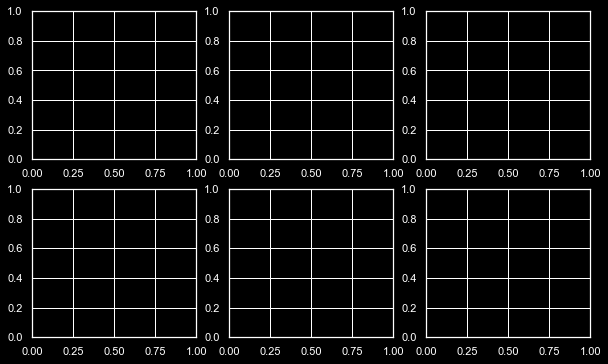

In [78]:
fig, axes = plt.subplots(2, 3) # creates a grid of subplots, 2 X 3
axes # this becomes an array that we can index like a 2D array


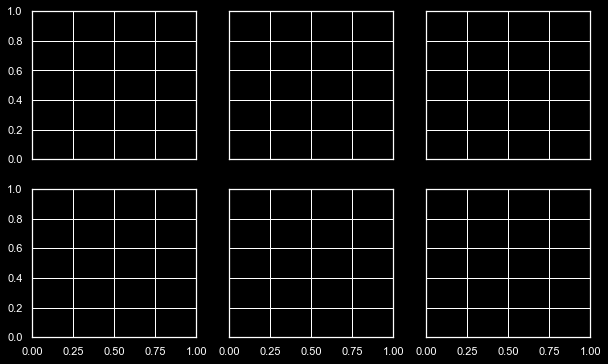

In [79]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)  # all axes in x and y share the same axis

### Adjusting the spacing around subplots

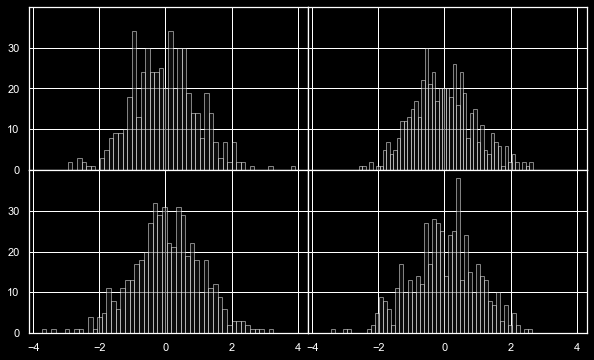

In [80]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0) # sets spacing between the plots to zero

### Colors, Markers, and Line Style

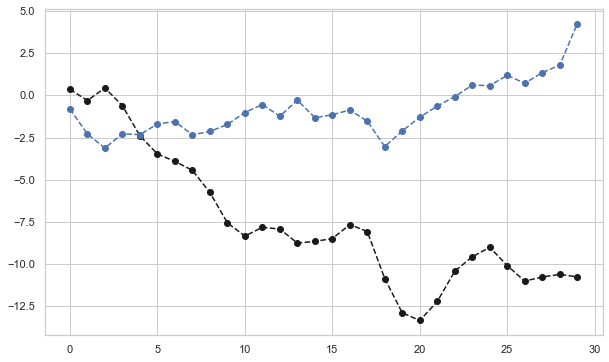

In [112]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--') # short way
plt.plot(randn(30).cumsum(), color='b', linestyle='dashed', marker='o') # longer more explicit way
# each line above creates a separate line

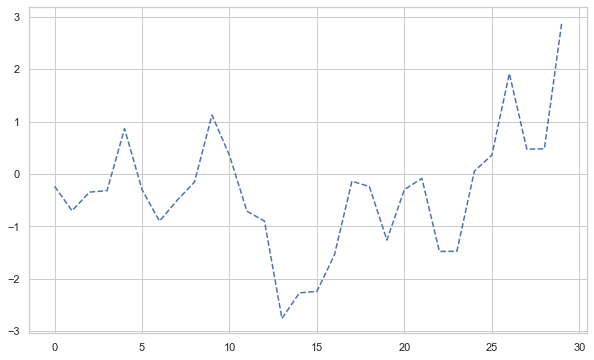

In [113]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'b--', label='Default')


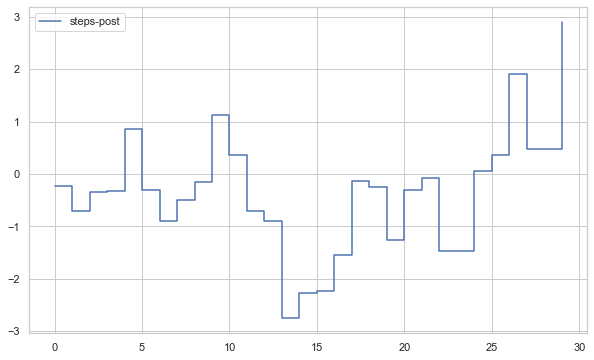

In [114]:

plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post') # specifies a different draw style
plt.legend(loc='best')

### Setting the title, axis labels, ticks, ticklabels

Text(0.5, 0, 'Stages')

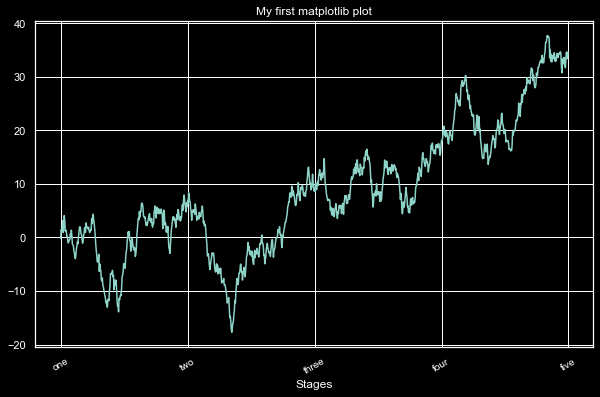

In [84]:
# create a simple figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # sets the x ticks
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small') # sets the labels for the ticks
ax.set_title('My first matplotlib plot') # sets the title
ax.set_xlabel('Stages') # sets the x axis label

### Adding legends

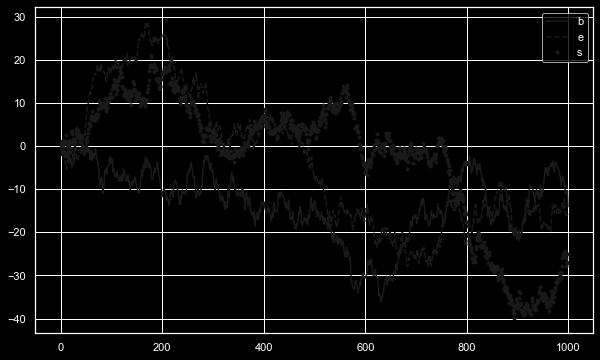

In [85]:
from numpy.random import randn
# to create a legend, pass a label argument when adding each piece of the plot
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend('best')

### Annotation and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

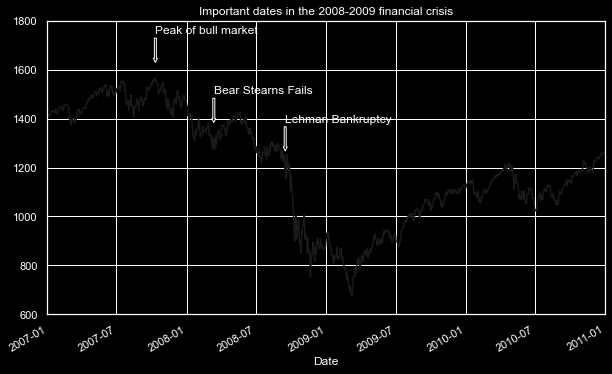

In [86]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), # ax.annotate can draw labels at the indicated x and y coordinates
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

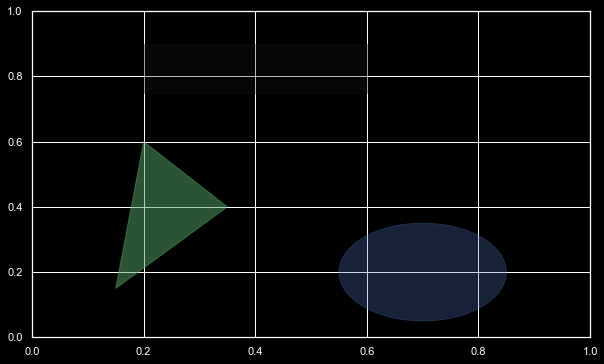

In [87]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3) 
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

plt.savefig('shape.png', dpi=400, bbox_inches='tight') # save figure to a file



In [88]:
import os
os.remove('shape.png')
plt.close('all')

### Plotting with pandas and seaborn
Line plots

<AxesSubplot:>

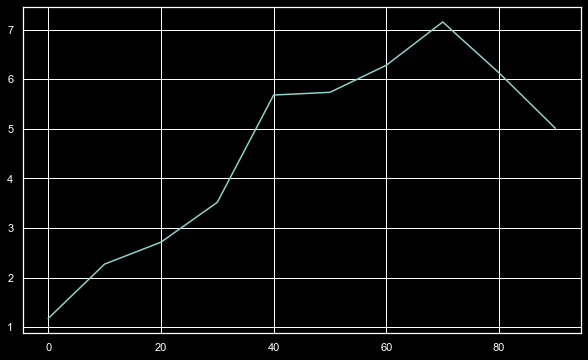

In [89]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot() # plot a panda series. the series object index is used for the index

<AxesSubplot:>

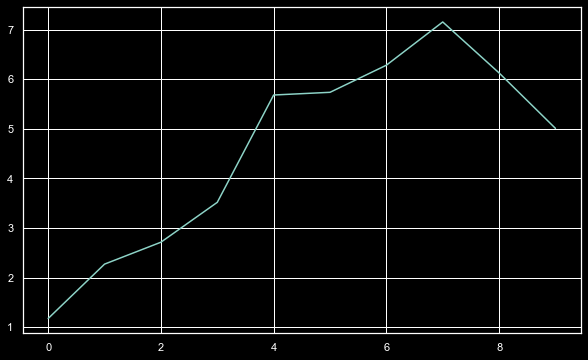

In [90]:
s.plot(use_index=False) # this doesn't use the index for the x axis

<AxesSubplot:>

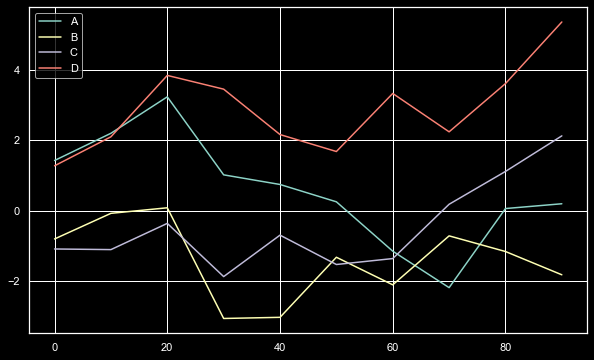

In [91]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

<AxesSubplot:>

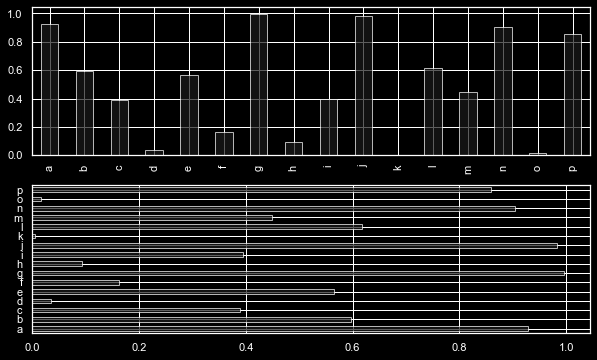

In [92]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<AxesSubplot:xlabel='nums'>

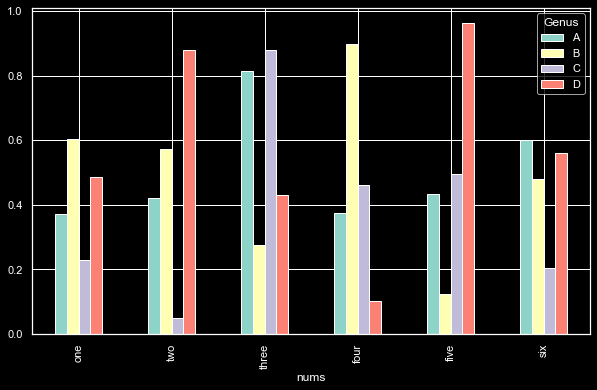

In [93]:
np.random.seed(12348)
df = pd.DataFrame(np.random.rand(6, 4),
                  index=pd.Index(['one', 'two', 'three', 'four', 'five', 'six'], name='nums'),
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus')) # use the pd.Index method to add the name
df
df.plot.bar()

<AxesSubplot:ylabel='nums'>

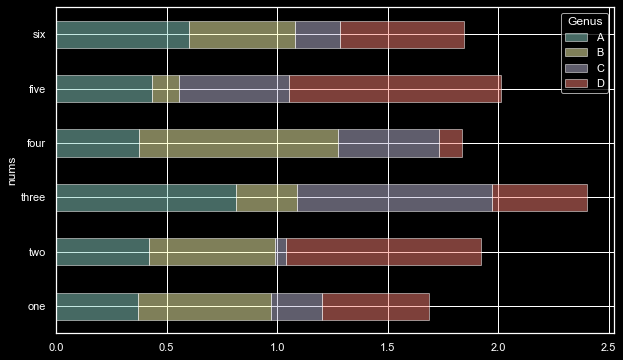

In [94]:
df.plot.barh(stacked=True, alpha=0.5)

In [95]:
tips = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [96]:
party_counts = pd.crosstab(tips['day'], tips.size) # creates a frequency table of the fractors
party_counts

col_0,1464
day,
Fri,19
Sat,87
Sun,76
Thur,62


<AxesSubplot:xlabel='day'>

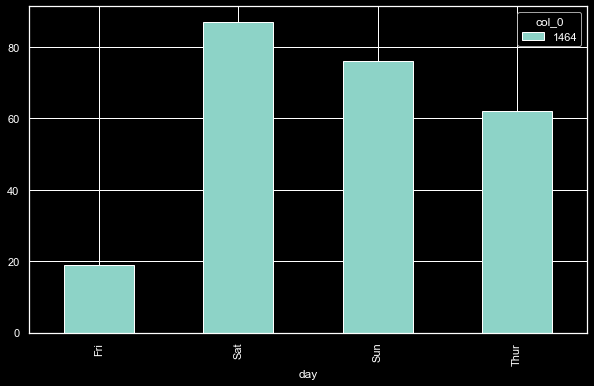

In [97]:
party_counts.plot.bar()

In [98]:
# seaborne is good or aggregation
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()


,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

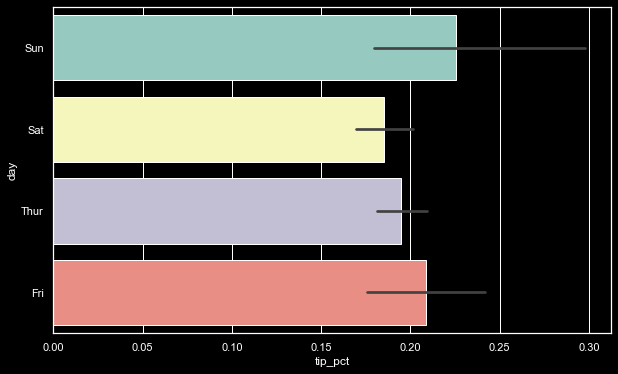

In [99]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h') # takes a datafame and an x and y


In [100]:
plt.close('all')

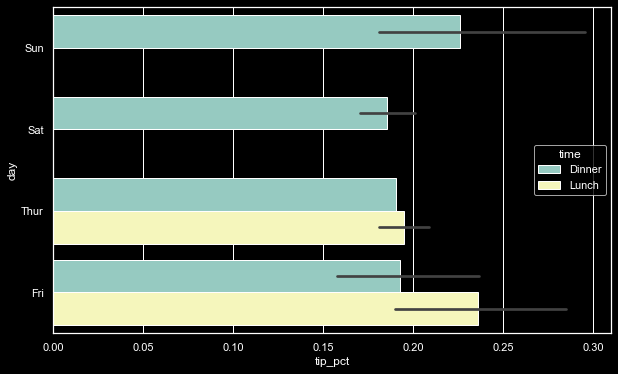

In [101]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h') # the hue allows us to split by an additional categorical variable
sns.set(style="whitegrid") # sets the appearance

In [102]:
plt.close('all')


### Histograms and Density Plots

<AxesSubplot:ylabel='Frequency'>

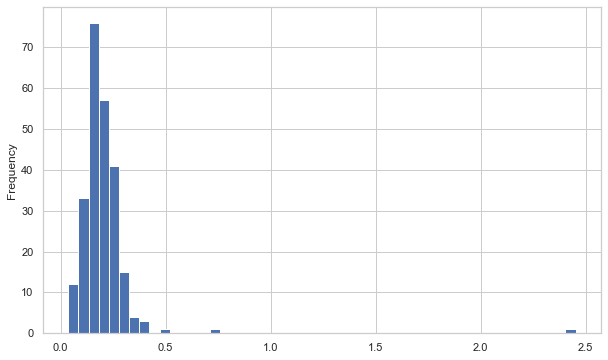

In [103]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

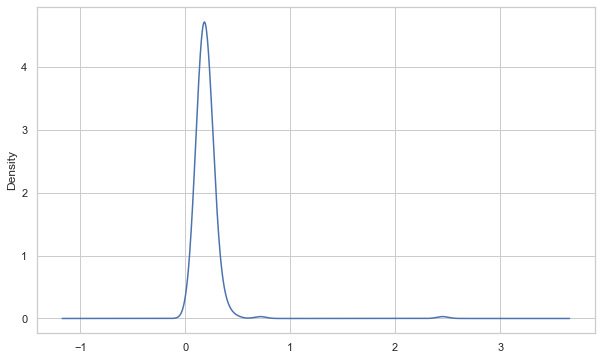

In [104]:
tips['tip_pct'].plot.density()

C:\Users\alexander.d.maccalma\.conda\envs\default-python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

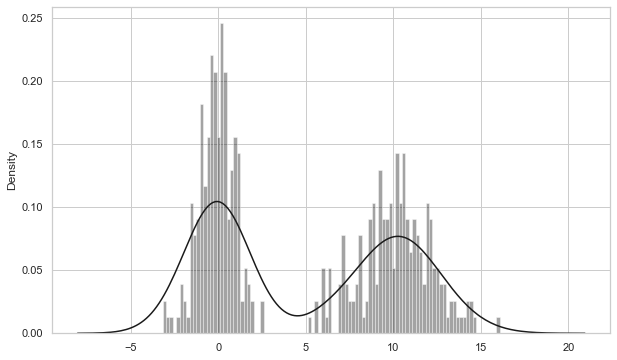

In [105]:
# seaborn plots
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2])) # stack the two distributions
sns.distplot(values, bins=100, color='k')

### Scatter and Point Plots

In [106]:
macro = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna() # compute the log differences
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


C:\Users\alexander.d.maccalma\.conda\envs\default-python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

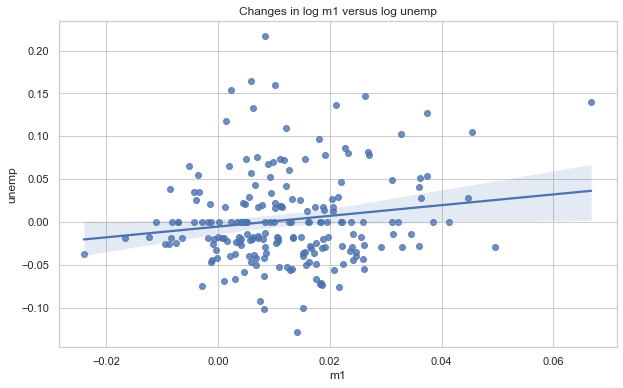

In [107]:
sns.regplot('m1', 'unemp', data=trans_data) # makes a scatter plot and fits a linear regression line
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

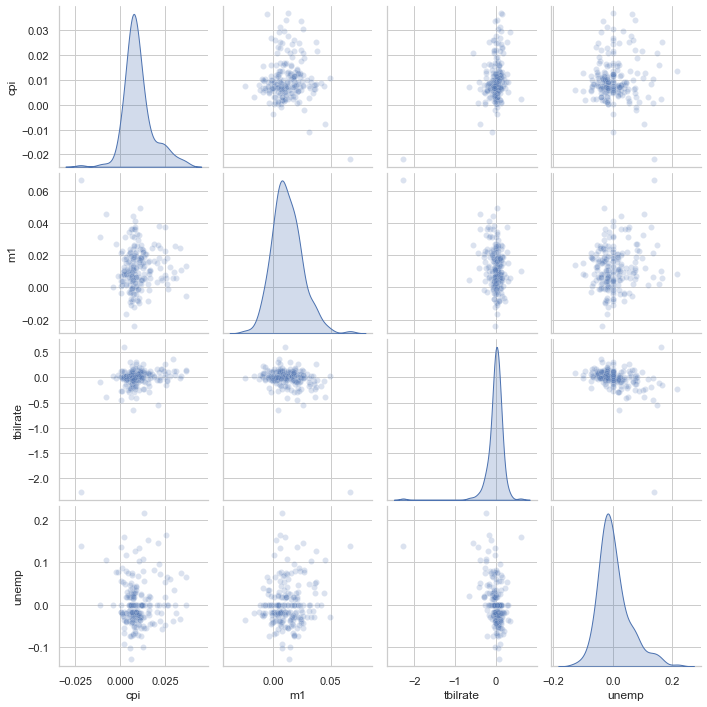

In [108]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2}) # paired plots

### Facet Grids and Categoridcal Data

C:\Users\alexander.d.maccalma\.conda\envs\default-python3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


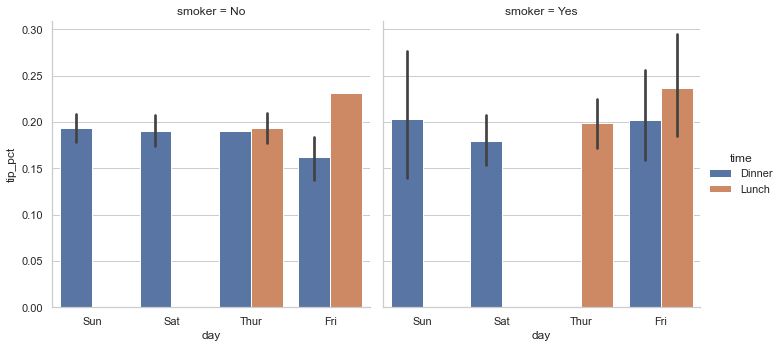

In [109]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])    # a facet grid

C:\Users\alexander.d.maccalma\.conda\envs\default-python3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


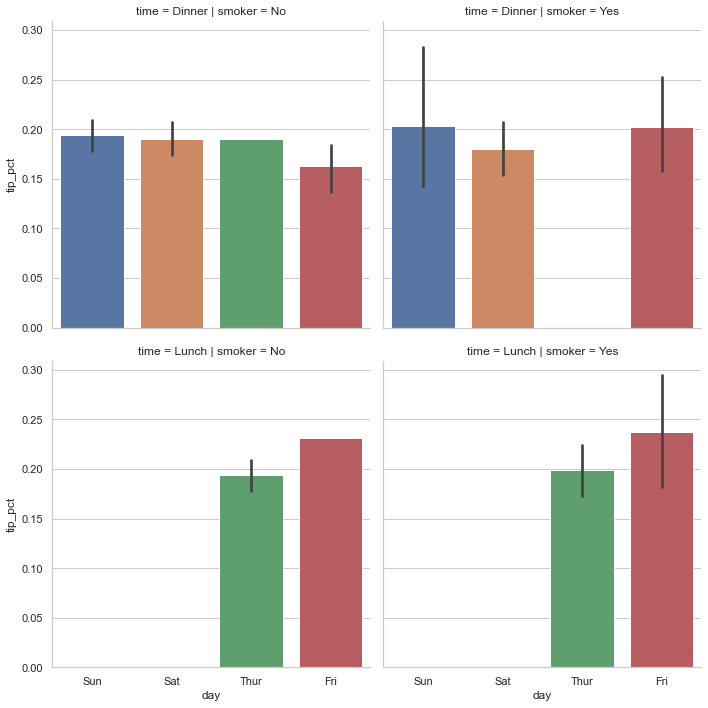

In [110]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\alexander.d.maccalma\.conda\envs\default-python3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


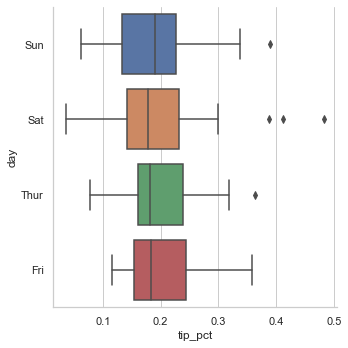

In [111]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5]) # boxplots

[Bokeh](https://docs.bokeh.org/en/latest/) and [ploty](https://github.com/plotly/plotly.py) provide dynamic visualization